# Training, Validation, and Testing

In machine learning, the development of a predictive model involves three critical stages:

1. **Training**: The model learns from data. This stage uses labeled examples (input-output pairs) to estimate the parameters of the model.
2. **Validation**: The model's performance is evaluated on unseen data to fine-tune hyperparameters and avoid overfitting.
3. **Testing**: The model's final performance is assessed on a completely separate dataset to evaluate its generalizability.

This notebook demonstrates these steps, including data preprocessing, clustering, and linear regression modeling.


## Step 1: Data Loading and Preprocessing

To ensure meaningful analysis, the dataset must first be prepared by:
- Handling missing values.
- Encoding categorical variables.
- Standardizing numerical features.

These preprocessing steps make the data ready for modeling and clustering.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('data.csv')

# Display the first few rows
data.head()

# Drop columns with too many missing values or unnecessary features
# data = data.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

# Handle missing values (median for simplicity)
data = data.fillna(data.median(numeric_only=True))

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)


## Step 2: Clustering Analysis

Clustering is used to group data into distinct categories based on similarity. 
Here, K-means clustering is applied to numerical features, and the resulting clusters are visualized.

### Key Steps:
1. Standardizing numerical features for clustering.
2. Applying K-means to create three clusters.
3. Visualizing clusters based on living area and sale price.


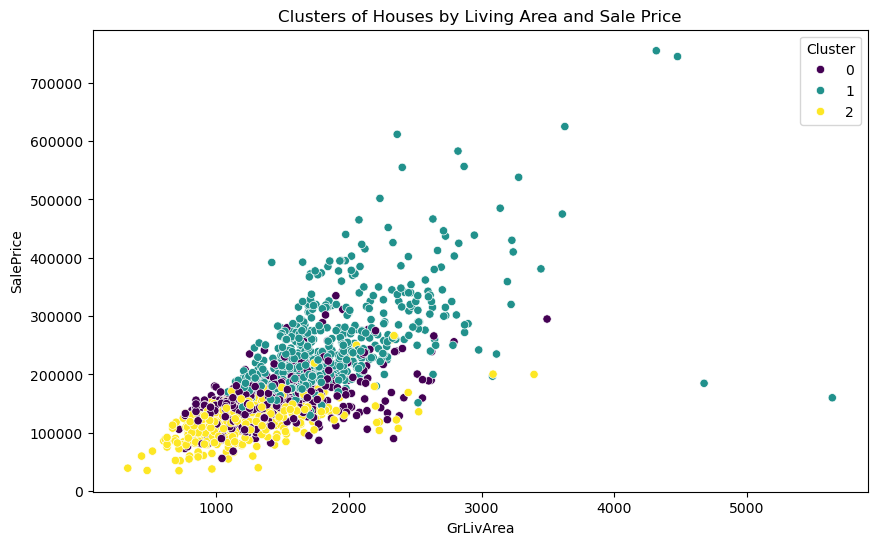

In [2]:
# Select numerical features for clustering
numerical_features = ['LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea', 'GarageCars']
X_cluster = data[numerical_features]

# Standardize features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='Cluster', data=data, palette='viridis')
plt.title('Clusters of Houses by Living Area and Sale Price')
plt.show()


## Step 3: Splitting Data

To evaluate the model's performance effectively, the data is split into three sets:
- **Training Set (70%)**: Used to train the model.
- **Validation Set (15%)**: Used to tune hyperparameters and evaluate performance during training.
- **Test Set (15%)**: Used to assess the model's generalizability.

The validation and test sets are created by further splitting a temporary set.


In [3]:
# Prepare features (X) and target (y)
X = data.drop(['SalePrice', 'Cluster'], axis=1)
y = data['SalePrice']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## Step 4: Model Training

A linear regression model is trained on the training set:
- The model learns to predict house sale prices based on the features.
- The parameters of the model are optimized to minimize the error between predicted and actual prices.


In [4]:

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)


LinearRegression()

## Step 5: Validation

The model's performance is evaluated on the validation set using metrics like:
- **Mean Squared Error (MSE)**: Measures average squared difference between predicted and actual values.
- **R-squared (R²)**: Indicates how well the model explains the variance in the target variable.


In [5]:

# Predict on validation and test sets
y_val_pred = regressor.predict(X_val_scaled)
y_test_pred = regressor.predict(X_test_scaled)


## Step 6: Testing

The final model is evaluated on the test set, which provides an unbiased assessment of its generalizability.
Performance is measured using the same metrics as for the validation set.


In [6]:
# Predict on test set
y_test_pred = regressor.predict(X_test_scaled)

# Calculate metrics on test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test:.2f}")
print(f"Test R2 Score: {r2_test:.2f}")


Test MSE: 247178976094655596368905382133760.00
Test R2 Score: -32479454382772046528512.00


## Step 7: Visualizing Actual vs. Predicted Prices

A scatter plot is used to visualize the relationship between actual and predicted prices. 
The closer the points are to the diagonal red line, the better the model's predictions.


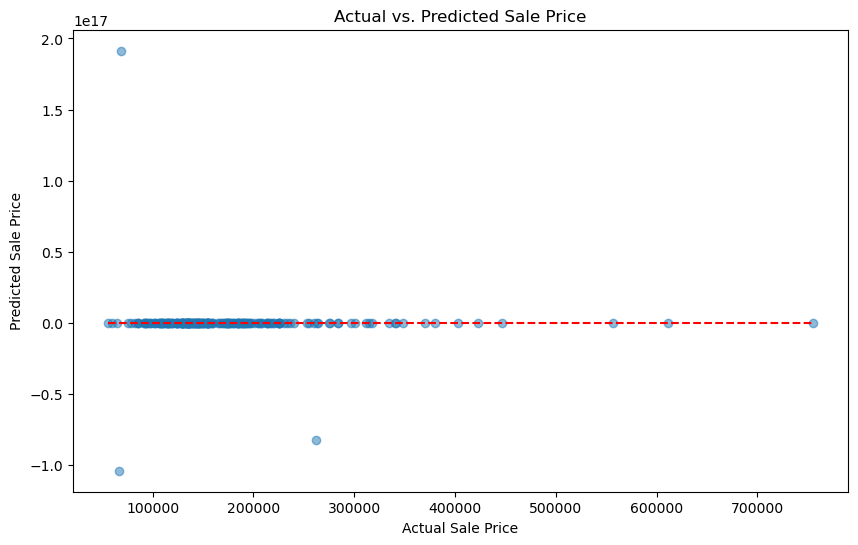

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.show()
